## Robot Init

In [1]:
from RobotInit import RobotInitPos

RobotInitPos("192.168.88.13")

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418


RobotException: Robot stopped

## Orient Val 3D

In [1]:
import urx
import numpy as np
import time
from math import isclose
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R
import math3d

import cv2

import sys
sys.path.append('..')

from utils.orientation.OrientEstimation import OrientEstimation
from utils.setup.setup import SetUp
from utils.support import*

rob = urx.Robot("192.168.88.13")

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 2098


In [2]:
th = 0.25

gt = []

Roll, Pitch, Yaw = [],[],[]

In [3]:
class picture():
    
    def __init__(self):
        self.hands, self.mpDraw, self.mpHands = SetUp.mediapipe()
        self.pipeline, self.config, self.align = SetUp.camera(640, 480, 60)
        self.OrientEstimation = OrientEstimation(640, 480)
        
        self.pipeline.start(self.config)
        try:
            self.pipeline.start(self.config)
        except:
            self.pipeline.stop()
            self.pipeline.start(self.config)
        

    def start(self):
        frames = self.pipeline.wait_for_frames()
        frames = self.align.process(frames)
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()

        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())
    

        dr_info = DrawInfo(color_image)

        coordinates = self.hands.process(color_image).multi_hand_landmarks
        if coordinates:
            list_for_coordinates = []
            for handLms in coordinates:
                rect = Bounding_Rect(color_image, handLms)
                brect, image = rect.draw()

            self.mpDraw.draw_landmarks(color_image, handLms, self.mpHands.HAND_CONNECTIONS)

            R,P,Y = self.OrientEstimation.OrientStart(color_image, depth_image, handLms)
            cv2.imshow('RealSense', color_image)
            cv2.waitKey(1)

            return R,P,Y

        cv2.imshow('RealSense', color_image)
        cv2.waitKey(1)
        
        return 0,0,0

In [4]:
p = picture()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
for i in range(200):
    hand_r,hand_p,hand_y = p.start()
    

try:
    eur = R.from_euler('x', [th])
    test = eur.as_matrix()[0]
    rob.set_orientation(test, acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(th, r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[0]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
               
        
try:
    eur = R.from_euler('xy', [th, th])
    test2 = eur.as_matrix()
    rob.set_orientation(test2, acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(th, r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[1]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        
        
try:
    eur = R.from_euler('xyz', [th, th, th])
    test3 = eur.as_matrix()
    rob.set_orientation(test3, acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(th, r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[2]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        
        
        
try:
    eur = R.from_euler('xyz', [th, 0, th])
    test4 = eur.as_matrix()
    rob.set_orientation(test4, acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(1, 1+r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[1]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        
try:
    eur = R.from_euler('xyz', [0, 0, th])
    test5 = eur.as_matrix()
    rob.set_orientation(test5,acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(1, 1+r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[0]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        

try:
    eur = R.from_euler('z', [0])
    test6 = eur.as_matrix()[0]

    rob.set_orientation(test6, acc=0.04, vel=0.04)
except:  
    r_gt = 100 
    while not isclose(1, 1+r_gt, rel_tol=1e-3):
        mat = R.from_matrix(rob.get_orientation().array)
        pos = mat.as_euler("xyz")
        r_gt = pos[2]
        gt.append(pos)
        hand_r,hand_p,hand_y = p.start()
        Roll.append(hand_r)
        Pitch.append(hand_p)
        Yaw.append(hand_y)
        
        
cv2.destroyAllWindows()

gt = np.array(gt)

In [6]:
def norm(x,y,z,gt_x,gt_y,gt_z):
    
    delta_x = gt_x-x
    delta_y = gt_y-y
    delta_z = gt_z-z

    delta_std_x = np.std(delta_x)
    delta_std_y = np.std(delta_y)
    delta_std_z = np.std(delta_z)

    print(delta_std_x,delta_std_y,delta_std_z)

    mean_delta_x = np.mean(delta_x)
    mean_delta_y = np.mean(delta_y)
    mean_delta_z = np.mean(delta_z)

    mean_delta_x, mean_delta_y, mean_delta_z

    norm_x = x + mean_delta_x
    norm_y = y + mean_delta_y
    norm_z = z + mean_delta_z
    
    return norm_x, norm_y, norm_z

In [7]:
R_gt = gt[:,2]* 180/np.pi
P_gt = gt[:,0] * 180/np.pi
Y_gt = gt[:,1]* 180/np.pi


R = np.array(Roll)
P = np.array(Pitch)*-1
Y = np.array(Yaw)

In [8]:
norm_R, norm_P, norm_Y = norm(R,P,Y,R_gt,P_gt,Y_gt)

1.3784132781929135 1.8558481618826355 1.480975813760074


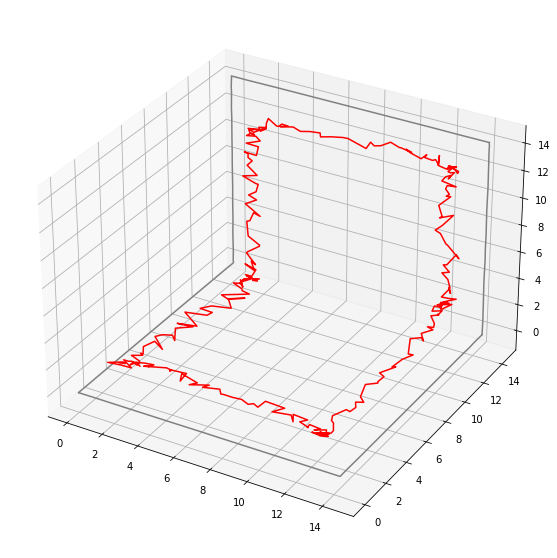

In [9]:
ax = plt.axes(projection='3d')

# ax.plot3D(R, P, Y, 'red')
ax.plot3D(R_gt,P_gt,Y_gt, 'gray')
ax.plot3D(norm_R,norm_P,norm_Y, 'red')



ax.figure.set_size_inches(10,10)

In [10]:
def MSE(norm_x, norm_y, norm_z, gt_x, gt_y, gt_z, mode):
    
    if mode == "mm": rank = 1000
    elif mode == "degree": rank = 1

    MSE_X = ((np.sum((norm_x-gt_x)**2))/norm_x.shape[0]) * rank
    MSE_Y = ((np.sum((norm_y-gt_y)**2))/norm_y.shape[0]) * rank
    MSE_Z = ((np.sum((norm_z-gt_z)**2))/norm_z.shape[0]) * rank

    return MSE_X, MSE_Y, MSE_Z

In [11]:
MSE_X, MSE_Y, MSE_Z = MSE(norm_R,norm_P,norm_Y, R_gt,P_gt,Y_gt, "degree")
MSE_X, MSE_Y, MSE_Z

(1.9000231654985353, 3.444172399963157, 2.1932893609423134)

In [12]:
R = R.reshape(R.shape[0],1)
P = P.reshape(P.shape[0],1)
Y = Y.reshape(Y.shape[0],1)
RPY = np.concatenate((R,P,Y), 1)

In [13]:
# np.save("RPY/Ildar/hand1", RPY)
# np.save("RPY/Ildar/robot1", gt)


np.save("RPY/Ildar/hand2", RPY)
np.save("RPY/Ildar/robot2", gt)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 333, in _get_data
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out


## Orient Eval

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urx
import cv2

import sys
sys.path.append('..')

from utils.orientation.OrientEstimation import OrientEstimation
from utils.setup.setup import SetUp
from utils.support import*

In [2]:
rob = urx.Robot("192.168.88.131")
hands, mpDraw, mpHands = SetUp.mediapipe()
W = 640
H = 480
pipeline, config, align = SetUp.camera(640, 480, 60)
# cvFpsCalc = CvFpsCalc(buffer_len=10)
# poseEstimation = PoseEstimation(640, 480)
orientEstimation = OrientEstimation(640, 480)

try:
    pipeline.start(config)
except:
    pipeline.stop()
    pipeline.start(config)

times = 0   
Roll, Pitch, Yaw = [],[],[]
GT = []
while times < 350:
    # fps = cvFpsCalc.get()

    frames = pipeline.wait_for_frames()
    frames = align.process(frames)
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    dr_info = DrawInfo(color_image)

    coordinates = hands.process(color_image).multi_hand_landmarks
    if coordinates:
        list_for_coordinates = []
        for handLms in coordinates:
            rect = Bounding_Rect(color_image, handLms)
            brect, image = rect.draw()

        mpDraw.draw_landmarks(color_image, handLms, mpHands.HAND_CONNECTIONS)

        # poseEstimation.PoseStart(handLms, depth_image)
        R,P,Y = orientEstimation.OrientStart(color_image, depth_image, handLms)
        orient = rob.get_orientation()
        times += 1
        
        Roll.append(R)
        Pitch.append(P)
        Yaw.append(Y)
        
        GT.append(orient)


    # dr_info.FPS(fps)
    cv2.imshow('RealSense', color_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        pipeline.stop()
        break
        
cv2.destroyAllWindows()
pipeline.stop()

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1013
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1418
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
q0 = np.array([O.get_quaternion()[0] for O in GT])
q1 = np.array([O.get_quaternion()[1] for O in GT])
q2 = np.array([O.get_quaternion()[2] for O in GT])
q3 = np.array([O.get_quaternion()[3] for O in GT])

In [4]:
gt_Pitch = np.arctan2(2*(q0*q1+q2*q3), 1-2*((q1**2)+(q2**2))) * 180/np.pi
gt_Yaw = np.arcsin(2*(q0*q2-q3*q1)) * 180/np.pi
gt_Roll = np.arctan2(2*(q0*q3+q1*q2), 1-2*((q2**2)+(q3**2))) * 180/np.pi

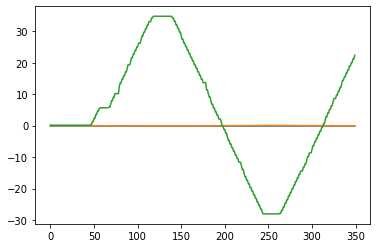

In [5]:
plt.plot(gt_Roll)
plt.plot(gt_Pitch)
plt.plot(gt_Yaw)

In [2]:
plt.plot(Roll)
plt.plot(Pitch)
plt.plot(Yaw)

NameError: name 'plt' is not defined

In [7]:
# np.save("Pitch/handR", R)
# np.save("Pitch/handP", P)
# np.save("Pitch/handY", Y)

# np.save("Pitch/robotR", gt_Roll)
# np.save("Pitch/robotP", GT_P)
# np.save("Pitch/robotY", GT_Y)


# np.save("Yaw/handR", Roll)
# np.save("Yaw/handP", Pitch)
# np.save("Yaw/handY", Yaw)

# np.save("Yaw/robotR", gt_Roll)
# np.save("Yaw/robotP", gt_Pitch)
# np.save("Yaw/robotY", gt_Yaw)

# np.save("Yaw/handR", R)
# np.save("Yaw/handP", P)
# np.save("Yaw/handY", Y)

# np.save("Yaw/robotR", GT_R)
# np.save("Yaw/robotP", GT_P)
# np.save("Yaw/robotY", GT_Y)

In [5]:
R = np.array(Roll[50:])
P = np.array(Pitch[50:])
Y = np.array(Yaw[50:])

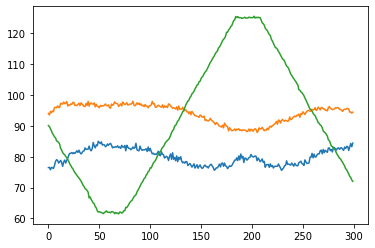

In [6]:
plt.plot(R)
plt.plot(P)
plt.plot(Y)

plt.show()

In [7]:
GT_R = np.array([O.get_quaternion()[3] for O in GT])
GT_P = np.array([O.get_quaternion()[1] for O in GT])
GT_Y = np.array([O.get_quaternion()[2] for O in GT])

GT_R = GT_R[50:]
GT_P = GT_P[50:]
GT_Y = GT_Y[50:]

In [42]:
def Norm(Roll, Pith, Yaw):

    Min = np.array([Roll.min(), Pith.min(), Yaw.min()])
    min_value = Min[np.argmin(Min)]

    Max = np.array([Roll.max(), Pith.max(), Yaw.max()])
    max_value = Max[np.argmax(Min)]


    Roll_nporm = Roll.copy()
    Roll_nporm -= min_value
    Roll_nporm /= max_value

    Pith_nporm = Pith.copy()
    Pith_nporm -= min_value
    Pith_nporm /= max_value

    Yaw_nporm = Yaw.copy()
    Yaw_nporm -= min_value
    Yaw_nporm /= max_value
    
    return Roll_nporm, Pith_nporm, Yaw_nporm


N_R, N_P, N_Y = Norm(R, P, Y)
N_GT_R, N_GT_P, N_GT_Y = Norm(GT_R, GT_P, GT_Y)

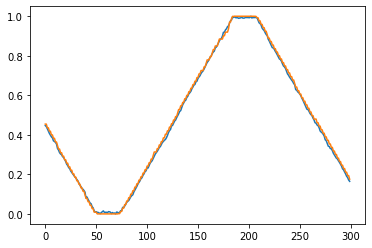

In [8]:
normP = Y.copy()
normGtP = GT_Y.copy()


normP -= normP.min()
normP /= normP.max()

# normGtP *= -1
normGtP -= normGtP.min()
normGtP /= normGtP.max()

plt.plot(normP)
plt.plot(normGtP)

plt.show()

In [9]:
# np.save("Pitch/handR", R)
# np.save("Pitch/handP", P)
# np.save("Pitch/handY", Y)

# np.save("Pitch/robotR", GT_R)
# np.save("Pitch/robotP", GT_P)
# np.save("Pitch/robotY", GT_Y)


# np.save("Roll/handR", R)
# np.save("Roll/handP", P)
# np.save("Roll/handY", Y)

# np.save("Roll/robotR", GT_R)
# np.save("Roll/robotP", GT_P)
# np.save("Roll/robotY", GT_Y)

# np.save("Yaw/handR", R)
# np.save("Yaw/handP", P)
# np.save("Yaw/handY", Y)

# np.save("Yaw/robotR", GT_R)
# np.save("Yaw/robotP", GT_P)
# np.save("Yaw/robotY", GT_Y)

Exception in thread Thread-5:
Exception in thread Thread-6Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 333, in _get_data
Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/lena/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out
    self.run()
  File "/home/lena/anaconda3/lib/python3.9/site-packages/urx/ursecmon.py", line 286, in run
    data = self._get_data()
 